Kickstarter is one of the biggest crowdfunding platforms in the world and allows people from all over the globe to back new inventions and creative projects that capture their interest, ranging from Arts/Comics to Tech Design and Music. Since its launch in 2009, the crowdfunding platform has raised over USD 4.6 billion and continues to raise over USD 1.5 million a day. It operates on an all-or-nothing model, and funds are only released if a campaign meets its funding goal by the deadline. 

The dataset used in this project was obtained from webrobots.io, an online webscraper service. It includes all Kickstarter campaigns from March 2016 to July 2020. The aim of this project is to identify the common characteristics of successful projects and thus increase the likelihood of a future project succeeding, and to train a machine learning model that is able to accurately predict whether or not a campaign was successful. 

In [222]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import glob
import os
import datetime
import dateutil.relativedelta
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline


The complete dataset was stored in 57 separate CSV files. The files were combined using glob and concat, and the resulting CSV has 209,445 rows and 41 columns. 

In [223]:
#Dataset from https://webrobots.io/kickstarter-datasets/
#Source Code: https://stackoverflow.com/questions/52289386/loading-multiple-csv-files-of-a-folder-into-one-dataframe

all_filenames = [i for i in glob.glob('data/*.csv')]    
df = pd.concat([pd.read_csv(f, encoding = 'unicode escape') for f in all_filenames ]) 
df.shape

(209445, 41)

# Data Cleaning and Feature Engineering

In [224]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'last_update_published_at', 'launched_at', 'location', 'name',
       'permissions', 'photo', 'pledged', 'profile', 'slug', 'source_url',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'unread_messages_count', 'unseen_activity_count',
       'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

Column descriptions are as follows:

backers_count : The number of backers that contributed to a project 

blurb: Description of the project 

category: The category that the project falls under. Examples of categories include Arts, Comics, Craft, Design, Fashion, and Journalism.

converted_pledged_amount: Amount pledged, converted to the currency in 'current_currency'

country: Country where the project creator is from (country code) 

country_displayable_name: Country where the project creator is from (full country name)

created_at: Time and date when the project was created (Unix time)

creator: ID and name of project creator

currency: Original currency of project 

currency_symbol: Original currency symbol of project

currency_trailing_code: Unclear (Returns true or false) 

current_currency: Currency currently used by project 

deadline: Time and date when project closes and no more funds are accepted 

disable_communication: Whether or not backers can communicate with the project creator 
 
friends: Unclear (null values) 

fx_rate: Fx rate between original currency and current currency 
       
goal: Amount the project creator aims to raise 

id: Unique project ID
       
is_backing: Unclear (mostly null values) 
       
is_starrable: Whether or not a project can be starred
       
is_starred: Whether or not a project is starred 

last_update_published_at: When the project was last updated (null values) 

launched_at: Time and date the project was launched to the public (Unix time) 

location: City where the project creator is from 

name: Name of project 

permissions: Unclear (null values) 

photo: Link to project photos

pledged: Amount pledged in current currency 

profile: Contains incomplete information on projects

slug: Name of projects with hyphens

source_url: URL of project category

spotlight: Whether or not the project creator created a central hub for the project after successful funding 

staff_pick: Whether or not the project was a staff pick (True or false) 

state: Target variable - whether a project succeeded or failed 

state_changed_at: Time and date when project state was changed (Unix time)

static_usd_rate: Conversion rate between original currency and USD 

unread_messages_count: Unclear (null values) 

unseen_activity_count: Unclear (null values) 

urls: Project URL 

usd_pledged: Amount pledged in USD 
usd_type: Domestic or international 

In [225]:
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type
0,167,Help us put the final touches on your new neig...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",30146,US,the United States,1552541877,"{""id"":1854083273,""name"":""The Bigfoot Taproom"",...",USD,$,...,True,False,successful,1562628664,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",30146.000000,domestic
1,26,High quality resin copy of this equestrian fig...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",1599,ES,Spain,1589813413,"{""id"":166874066,""name"":""Ivan Mata"",""slug"":""iva...",EUR,â¬,...,True,False,successful,1591687080,1.094011,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",1550.212893,domestic
2,22,The Shedding is a dark surreal drama focused o...,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",654,GB,the United Kingdom,1573239383,"{""id"":1475546789,""name"":""Eva Anjos"",""slug"":""th...",GBP,Â£,...,True,False,successful,1578257400,1.292750,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",646.374805,domestic
3,1,Ova Mobile est un projet franÃ§ais de studio d...,"{""id"":272,""name"":""Mobile Games"",""slug"":""games/...",6,FR,France,1514135425,"{""id"":2068430266,""name"":""ChloÃ© Bigot"",""is_reg...",EUR,â¬,...,False,False,failed,1519906279,1.241332,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",6.206662,domestic
4,41,Legally Bellas Magazine & Photography of 18 to...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",1330,US,the United States,1517584654,"{""id"":1030488260,""name"":""Legally Bellas"",""is_r...",USD,$,...,True,False,successful,1521392853,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",1330.000000,domestic


Duplicate rows are removed from the dataframe by checking for same IDs. All duplicates are dropped except for the last occurrence, and the dataframe now has 184,828 rows and 41 columns.

In [226]:
df = df.drop_duplicates(subset=['id'], keep='last')
df.shape


(184828, 41)

In [227]:
df = df.drop(['friends','is_backing','is_starred','last_update_published_at','unread_messages_count','unseen_activity_count','permissions'],axis=1)

The columns above were dropped as they were mostly empty. 

In [228]:
df =  df.drop(['created_at','pledged','converted_pledged_amount','currency_symbol','country','creator','currency','currency_trailing_code','current_currency','fx_rate','location','photo','profile','slug','source_url','static_usd_rate','urls','spotlight'],axis=1)

#I decided to keep the pledged amount in USD for the sake of consistency. After filtering out uninformative columns, 10 columns remained for further analysis. The class variable in this dataset is "state", which tells us whether the Kickstarter campaign succeeded or failed. 

The columns above were dropped for the following reasons:

created_at: launched_at is more informative as it tells us when the campaign was published publicly

pledged: usd_pledged is used instead to ensure currency consistency 

converted_pledged_amount: Same as above

slug: Same as above 

currency: Not needed as figures in USD are used instead 

currency_symbol: Same as above  

currency_trailing_code: Same as above 

fx_rate: Same as above 

static_usd_rate: Same as above 

country: Not needed as country name has been kept 

creator: Details of campaign creator is not useful 

current_currency: Boolean variable, not informative as USD is used 

location: Gives city where the campaign is held, however country is used to analyse location in this project 

photo: Image processing is beyond the scope of this project 

source_url: URL to the project category is not required for analysis

urls: URL to the project is not required for analysis 

spotlight: Is dependent on whether or not a campaign was successful, hence is not informative 




In [229]:
df.isnull().sum(axis = 0)
df = df.drop(['usd_type'], axis=1)

backers_count                 0
blurb                         8
category                      0
country_displayable_name      0
deadline                      0
disable_communication         0
goal                          0
id                            0
is_starrable                  0
launched_at                   0
name                          1
staff_pick                    0
state                         0
state_changed_at              0
usd_pledged                   0
usd_type                    227
dtype: int64

The code above checks for null values in each of the columns. There are 227 null values in 'usd_type' and 8 null values in 'blurb'. 'usd_type' is dropped as this tells us if a project is domestic or international and we can already get this information from 'country_displayable_name' column. 

There are 8 missing values in blurb, however it will be left as it is. This likely does not stem from missing data, and is due to projects that do not have a blurb and hence does not affect accuracy of data. 

The project category and subcategory are extracted from the 'category' column by converting the string column into a dictionary, and obtaining the values of the 'name' and 'slug' keys. Two new columns filled with the project category and subcategory.

In [230]:
#extract category and subcategory
#https://stackoverflow.com/questions/63278204/python-pandas-regex-outputting-nan
df['category'] = df.category.astype(str)
df['category'] = df.category.apply(eval)
df["extracted_category"] = df.category.str["name"]
df["extracted_subcategory"] = df.category.str["slug"]
df = df.drop(['category'], axis=1)



Unix times in 'launched_at' and 'state_changed_at' are converted into DateTime format to the accuracy of seconds. This information is stored in a new column 'launch_datetime'.

In [231]:
unix_times = ['launched_at','state_changed_at']
df['launch_datetime'] = pd.to_datetime(df['launched_at'], unit = 's')
df['launch_datetime']

3      2018-01-30 12:11:19
5      2017-11-16 09:17:04
6      2015-11-16 14:14:40
7      2016-12-15 15:51:33
8      2013-03-20 09:02:54
               ...        
3704   2016-03-30 05:45:25
3705   2019-01-24 15:21:53
3706   2017-07-31 19:03:49
3707   2016-03-08 17:03:19
3708   2014-09-23 15:29:11
Name: launch_datetime, Length: 184828, dtype: datetime64[ns]

The year, month, day and hour that the projects were launched are extracted from the DateTime column and placed into 4 new columns. The launch hours are reformatted into a 2 hour range. 

In [232]:
df['launch_year'] = df['launch_datetime'].dt.year
df['launch_year'].astype(int)

3       2018
5       2017
6       2015
7       2016
8       2013
        ... 
3704    2016
3705    2019
3706    2017
3707    2016
3708    2014
Name: launch_year, Length: 184828, dtype: int64

In [233]:
df['launch_month'] = df['launch_datetime'].dt.month_name()
df['launch_month']

3         January
5        November
6        November
7        December
8           March
          ...    
3704        March
3705      January
3706         July
3707        March
3708    September
Name: launch_month, Length: 184828, dtype: object

In [234]:
df['launch_hour'] = df['launch_datetime'].dt.hour
df["launch_hour"].replace([0, 1], "12am - 2am", inplace=True)
df["launch_hour"].replace([2, 3],"2am - 4am", inplace=True)
df["launch_hour"].replace([4, 5],"4am - 6am", inplace=True)
df["launch_hour"].replace([6, 7], "6am - 8am", inplace=True)
df["launch_hour"].replace([8, 9], "8am - 10am", inplace=True)
df["launch_hour"].replace([10, 11], "10am - 12pm", inplace=True)
df["launch_hour"].replace([12, 13], "12pm - 2pm", inplace=True)
df["launch_hour"].replace([14, 15], "2pm - 4pm", inplace=True)
df["launch_hour"].replace([16, 17], "4pm - 6pm", inplace=True)
df["launch_hour"].replace([18, 19], "6pm - 8pm", inplace=True)
df["launch_hour"].replace([20, 21], "8pm - 10pm", inplace=True)
df["launch_hour"].replace([22, 23], "10pm - 12am", inplace=True)


df["launch_hour"]


3       12pm - 2pm
5       8am - 10am
6        2pm - 4pm
7        2pm - 4pm
8       8am - 10am
           ...    
3704     4am - 6am
3705     2pm - 4pm
3706     6pm - 8pm
3707     4pm - 6pm
3708     2pm - 4pm
Name: launch_hour, Length: 184828, dtype: object

In [235]:
df['launch_day'] = df['launch_datetime'].dt.day_name()
df['launch_day']

df = df.drop(['state_changed_at','launch_datetime'], axis=1)

3         Tuesday
5        Thursday
6          Monday
7        Thursday
8       Wednesday
          ...    
3704    Wednesday
3705     Thursday
3706       Monday
3707      Tuesday
3708      Tuesday
Name: launch_day, Length: 184828, dtype: object

To calculate the campaign length in days, the difference between 'deadline' and 'launched_at' was calculated and then converted into days. This information was stored in a new column 'campaign_length'. 'deadline' and 'launched_at' were dropped as these columns are no longer required. 

In [236]:
#calculate campaign length 
#https://stackoverflow.com/questions/45603232/python-difference-between-two-unix-timestamps
def campaign_length(deadline, launched_at):
    campaign_length = (deadline - launched_at)/(60*60*24)

    return campaign_length


df['campaign_length']= round(campaign_length(df.deadline, df.launched_at))
df = df.drop(['deadline','launched_at'], axis=1)
df.tail(3)

,backers_count,blurb,country_displayable_name,disable_communication,goal,id,is_starrable,name,staff_pick,state,usd_pledged,extracted_category,extracted_subcategory,launch_year,launch_month,launch_hour,launch_day,campaign_length
3706,1,"Bringing the great out door scenery indoors, w...",the United States,False,15000.0,1878721701,False,Kitchen Delight,False,failed,1.0,Woodworking,crafts/woodworking,2017,July,6pm - 8pm,Monday,28.0
3707,6,Independent dark comedy noir set in a fictiona...,the United States,False,2000.0,1443063301,False,9 Nights in Charles Creek,False,failed,1012.0,Comedy,film & video/comedy,2016,March,4pm - 6pm,Tuesday,60.0
3708,0,I want to travel across Ga. taking photos of o...,the United States,False,3200.0,1337101172,False,Vanishing Farm buildings in Ga.,False,failed,0.0,Fine Art,photography/fine art,2014,September,2pm - 4pm,Tuesday,38.0


Name and blurb length were calculated to analyse the investigate the relationship between longer names and blurbs and amount pledged. The columns were converted into string types. The lengths were then calculated and stored in 'name_length' and 'blurb_length'.

In [237]:
#extract name length 
df['name'] = df['name'].astype(str)
df['name_length'] = df['name'].apply(len)
df = df.drop(['name'], axis=1)
df['name_length']

3       10
5       19
6       13
7       20
8       46
        ..
3704    19
3705    13
3706    15
3707    25
3708    31
Name: name_length, Length: 184828, dtype: int64

In [238]:
#extract blurb length 
df['blurb'] = df['blurb'].astype(str)
df['blurb_length'] = df['blurb'].apply(len)
df = df.drop(['blurb'], axis=1)


State is our class variable. There are 4 different states, namely successful, failed, canceled, and live. Cancelled and live campaigns are removed from the dataframe as we are only analysing and predicting the success and failure of Kickstarter campaigns. Live campaigns are still ongoing, and canceled campaigns were cancelled before the deadline was reached.

In [239]:
df['state'].value_counts()

successful    100029
failed         72787
canceled        8904
live            3108
Name: state, dtype: int64

In [240]:
df = df[df.state != 'canceled']  
df = df[df.state != 'live']

In [241]:
df.columns
df.head()

Index(['backers_count', 'country_displayable_name', 'disable_communication',
       'goal', 'id', 'is_starrable', 'staff_pick', 'state', 'usd_pledged',
       'extracted_category', 'extracted_subcategory', 'launch_year',
       'launch_month', 'launch_hour', 'launch_day', 'campaign_length',
       'name_length', 'blurb_length'],
      dtype='object')

,backers_count,country_displayable_name,disable_communication,goal,id,is_starrable,staff_pick,state,usd_pledged,extracted_category,extracted_subcategory,launch_year,launch_month,launch_hour,launch_day,campaign_length,name_length,blurb_length
3,1,France,False,300.0,122681375,False,False,failed,6.206662,Mobile Games,games/mobile games,2018,January,12pm - 2pm,Tuesday,30.0,10,123
5,0,Italy,False,5000.0,1062759865,False,False,failed,0.000000,Electronic Music,music/electronic music,2017,November,8am - 10am,Thursday,45.0,19,55
6,0,the United Kingdom,False,3000.0,720535316,False,False,failed,0.000000,Comedy,film & video/comedy,2015,November,2pm - 4pm,Monday,60.0,13,121
7,44,Spain,False,10000.0,477403755,False,False,failed,531.830025,Graphic Design,design/graphic design,2016,December,2pm - 4pm,Thursday,35.0,20,98
8,21,the United States,False,15000.0,292755104,False,False,failed,256.000000,Mobile Games,games/mobile games,2013,March,8am - 10am,Wednesday,30.0,46,114


# Exploratory Data Analysis and Data Visualisation

In [242]:

#print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))

df.describe()
print("The total number of projects launched on Kickstarter from 2009 to 2020 is {0:,.0f}.".format(df.id.count()))
print("The total amount of money raised on Kickstarter from 2009 to 2020 is ${0:,.0f}.".format(df.usd_pledged.sum()))
print("")
print("The median amount of money each project aimed to raise is ${0:,.0f}.".format(df.backers_count.median()))
print("The median amount of money each project raised is ${0:,.0f}.".format(df.usd_pledged.median()))
print("The median number of individuals who backed each project is {0:,.0f} people.".format(df.backers_count.median()))
print("")
print("The median amount of money aimed to raise by successful projects is ${0:,.0f}.".format(df.loc[df['state'] == 'successful'].goal.median()))
print("The median amount of money raised by successful projects is ${0:,.0f}.".format(df.loc[df['state'] == 'successful'].usd_pledged.median()))
print("The median number of days successful projects ran for is {0:,.0f} days.".format(df.loc[df['state'] == 'successful'].campaign_length.median()))
print("")
print("The median amount of money aimed to raise by failed projects is ${0:,.0f}.".format(df.loc[df['state'] == 'failed'].goal.median()))
print("The median amount of money raised by failed projects is ${0:,.0f}.".format(df.loc[df['state'] == 'failed'].usd_pledged.median()))
print("The median number of days failed projects ran for is {0:,.0f} days.".format(df.loc[df['state'] == 'failed'].campaign_length.median()))



,backers_count,goal,id,usd_pledged,launch_year,campaign_length,name_length,blurb_length
count,172816.000000,1.728160e+05,1.728160e+05,1.728160e+05,172816.000000,172816.000000,172816.000000,172816.000000
mean,145.285824,4.918993e+04,1.073645e+09,1.294946e+04,2016.050933,32.820474,34.823529,109.780761
std,938.408067,1.203971e+06,6.191487e+08,1.026807e+05,2.306911,12.094291,15.684939,29.131431
min,0.000000,1.000000e-02,1.852000e+04,0.000000e+00,2009.000000,1.000000,1.000000,1.000000
25%,4.000000,1.500000e+03,5.370619e+08,1.110000e+02,2014.000000,30.000000,22.000000,96.000000
50%,27.000000,5.000000e+03,1.073533e+09,1.535000e+03,2016.000000,30.000000,34.000000,122.000000
75%,88.000000,1.400000e+04,1.609719e+09,6.357000e+03,2018.000000,35.000000,49.000000,132.000000
max,105857.000000,1.000000e+08,2.147476e+09,1.296961e+07,2020.000000,98.000000,143.000000,405.000000


The total number of projects launched on Kickstarter from 2009 to 2020 is 172,816.
The total amount of money raised on Kickstarter from 2009 to 2020 is $2,237,873,620.

The median amount of money each project aimed to raise is $27.
The median amount of money each project raised is $1,535.
The median number of individuals who backed each project is 27 people.

The median amount of money aimed to raise by successful projects is $3,500.
The median amount of money raised by successful projects is $4,690.
The median number of days successful projects ran for is 30 days.

The median amount of money aimed to raise by failed projects is $7,000.
The median amount of money raised by failed projects is $58.
The median number of days failed projects ran for is 30 days.


In [243]:
df = df.drop(['id'],axis=1)


A large majority of the campaigns were launched in the United States at 72.5%, followed by the United Kingdom at 10.3% and Canada at 3.8%. The remaining campaigns were mostly launched in Europe, and a very small number of campaigns were started in Asia. 

In [244]:
df['country_displayable_name'].value_counts()
df['country_displayable_name'].value_counts(normalize=True)

the United States     121823
the United Kingdom     19075
Canada                  7887
Australia               3959
Germany                 2960
France                  2334
Mexico                  2224
Italy                   2077
Spain                   1784
the Netherlands         1497
Sweden                  1221
Hong Kong                978
Denmark                  779
New Zealand              773
Singapore                602
Switzerland              571
Ireland                  517
Belgium                  494
Austria                  410
Norway                   401
Japan                    396
Luxembourg                54
Name: country_displayable_name, dtype: int64

the United States     0.704929
the United Kingdom    0.110378
Canada                0.045638
Australia             0.022909
Germany               0.017128
France                0.013506
Mexico                0.012869
Italy                 0.012019
Spain                 0.010323
the Netherlands       0.008662
Sweden                0.007065
Hong Kong             0.005659
Denmark               0.004508
New Zealand           0.004473
Singapore             0.003483
Switzerland           0.003304
Ireland               0.002992
Belgium               0.002859
Austria               0.002372
Norway                0.002320
Japan                 0.002291
Luxembourg            0.000312
Name: country_displayable_name, dtype: float64

No project creator disabled communications with backers, hence this column is dropped. 

In [245]:
df['disable_communication'].value_counts()
df = df.drop(['disable_communication'],axis=1)


False    172816
Name: disable_communication, dtype: int64

In [246]:
df.state.value_counts()

successful    100029
failed         72787
Name: state, dtype: int64

The most popular category is Web, followed by Pop and Children's Books. However, a large number of projects under the Web category did not succeed in raising its target amount. The categories with the highest number of successful campaigns are Children's Books, Pop and Fiction, followed by Sculpture and Rock, indicating Books and Music are strong categories. 

In [247]:
df['extracted_category'].value_counts()

Web                3682
Comedy             2855
Public Art         2397
Rock               2393
Indie Rock         2392
                   ... 
Social Practice      58
Chiptune             49
Television           21
Taxidermy            10
Toys                  7
Name: extracted_category, Length: 160, dtype: int64

In [248]:
df['extracted_category'].groupby(df['state']).value_counts().nlargest(40)
df = df.drop(["extracted_category"], axis=1)


state       extracted_category
failed      Web                   3121
successful  Rock                  2393
            Indie Rock            2392
            Shorts                2388
            Country & Folk        2386
            Nonfiction            2357
            Fiction               2354
            Children's Books      2313
            Comic Books           2306
            Accessories           2301
            Illustration          2274
            Video Games           2257
            Narrative Film        2212
            Apparel               2134
            Product Design        2111
            Tabletop Games        2087
failed      Mobile Games          2049
successful  Playing Cards         1961
            Graphic Novels        1913
failed      Software              1909
successful  Classical Music       1880
            Art Books             1842
            Webseries             1831
            Pop                   1783
failed      Restaurants          

In [249]:
df['extracted_subcategory'].groupby(df['state']).value_counts().nlargest(40)
df = df.drop(["extracted_subcategory"], axis=1)


state       extracted_subcategory      
successful  music/rock                     2393
            music/indie rock               2392
            film & video/shorts            2388
            music/country & folk           2386
            publishing/nonfiction          2357
            publishing/fiction             2354
            publishing/children's books    2313
            comics/comic books             2306
            fashion/accessories            2301
            art/illustration               2274
            games/video games              2257
            film & video/narrative film    2212
            fashion/apparel                2134
            design/product design          2111
            games/tabletop games           2087
failed      games/mobile games             2049
            technology/web                 2045
successful  games/playing cards            1961
            comics/graphic novels          1913
failed      technology/software            1909


The highest number of campaigns were launched in 2015, and the lowest in 2009 which was the year the website was founded. The highest percentage of campaings were launched in the month of May, however there is an even spread campaigns launched throughout the year. There is lowest activity in December, which coincides with the holiday season throughout the world. Tuesday was the most popular day to launch a campaign, closely followed by Monday. There was lower activity on the weekends, as expected. The most popular times to launch a campaign were 4pm - 6 pm, and from 6pm - 8pm, as people are more likely to have free time to launch a campaign after work. 

In [250]:
df['launch_year'].value_counts(ascending=False)
df['launch_year'].value_counts(normalize=True)

2015    30597
2016    23458
2017    23259
2019    23153
2014    21820
2018    19655
2013     9772
2020     8960
2012     6945
2011     3663
2010     1320
2009      214
Name: launch_year, dtype: int64

2015    0.177050
2016    0.135740
2017    0.134588
2019    0.133975
2014    0.126261
2018    0.113734
2013    0.056546
2020    0.051847
2012    0.040187
2011    0.021196
2010    0.007638
2009    0.001238
Name: launch_year, dtype: float64

In [251]:
df['launch_month'].value_counts()
df['launch_month'].value_counts( normalize=True)

March        16030
May          15643
October      15529
July         15138
April        15055
February     14927
November     14538
August       14165
January      14125
June         13959
September    13954
December      9753
Name: launch_month, dtype: int64

March        0.092758
May          0.090518
October      0.089859
July         0.087596
April        0.087116
February     0.086375
November     0.084124
August       0.081966
January      0.081734
June         0.080774
September    0.080745
December     0.056436
Name: launch_month, dtype: float64

In [252]:
df['launch_day'].value_counts()
df['launch_day'].value_counts( normalize=True)

Tuesday      35653
Monday       30122
Wednesday    30054
Thursday     26440
Friday       25900
Saturday     13673
Sunday       10974
Name: launch_day, dtype: int64

Tuesday      0.206306
Monday       0.174301
Wednesday    0.173908
Thursday     0.152995
Friday       0.149870
Saturday     0.079119
Sunday       0.063501
Name: launch_day, dtype: float64

In [253]:
df['launch_hour'].value_counts()
df['launch_hour'].value_counts( normalize=True)


4pm - 6pm      24932
6pm - 8pm      22311
2pm - 4pm      21143
8pm - 10pm     20279
10pm - 12am    17166
12am - 2am     13544
12pm - 2pm     13052
2am - 4am      10596
4am - 6am       8905
10am - 12pm     7581
6am - 8am       6889
8am - 10am      6418
Name: launch_hour, dtype: int64

4pm - 6pm      0.144269
6pm - 8pm      0.129103
2pm - 4pm      0.122344
8pm - 10pm     0.117344
10pm - 12am    0.099331
12am - 2am     0.078372
12pm - 2pm     0.075525
2am - 4am      0.061314
4am - 6am      0.051529
10am - 12pm    0.043867
6am - 8am      0.039863
8am - 10am     0.037138
Name: launch_hour, dtype: float64

Only 11.4% of campaigns were staff picks. No campaigns were starrable, hence the column was dropped. There is a relatively even split of successful and failed campaigns, with just over half of campaigns being successful at 52%. 

In [254]:
df['staff_pick'].value_counts(ascending=True)
df['staff_pick'].value_counts(ascending=True, normalize=True)

True      22373
False    150443
Name: staff_pick, dtype: int64

True     0.129461
False    0.870539
Name: staff_pick, dtype: float64

In [255]:
df['is_starrable'].value_counts()
df = df.drop(['is_starrable'],axis=1)


False    172816
Name: is_starrable, dtype: int64

In [256]:
df['state'].value_counts()
df['state'].value_counts(normalize=True)

successful    100029
failed         72787
Name: state, dtype: int64

successful    0.578818
failed        0.421182
Name: state, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16368d6d0>,
      dtype=object)

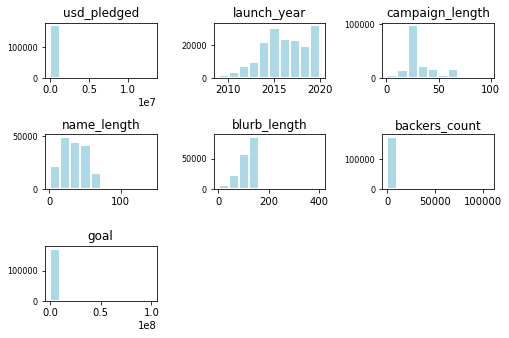

In [257]:
new_x_train= df[['usd_pledged', 'launch_year', 'launch_month','campaign_length','name_length','blurb_length','backers_count','goal']].copy()
new_x_train.hist(bins=10, color='lightblue',edgecolor='white',linewidth=2.0,
          xlabelsize=10, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Projects that succeeded had much lower goal amounts, compared to projects that failed to achieve their goal. This indicates that it may be beneficial for project creators to set a lower and more realistic goal amount to increase the chances for project success. 

Projects that failed have raised consistently low amounts, while there has been a steady increase in USD pledged for succesful projects from 2010 to 2020. 

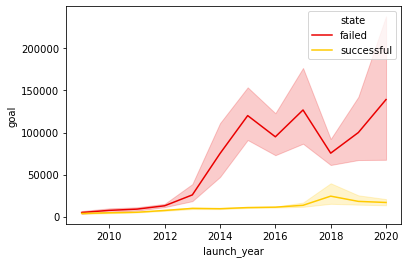

In [258]:
sns.lineplot(x='launch_year',y='goal',  hue = 'state', palette='hot' , data=df)

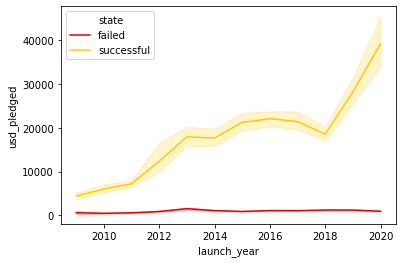

In [259]:
sns.lineplot(x='launch_year',y='usd_pledged',  hue = 'state', palette='hot', data=df)


Staff picked campaigns were more likely to succeed than fail. Successful campaigns also had a much higher mean number of backers. Blurb lengths were around the same for both successful and failed projects, indicating that blurb length has minimal impact on project success. Successful projects also slightly longer names and fewer campaign days, suggesting that the ideal campaign length is around 30 days. 

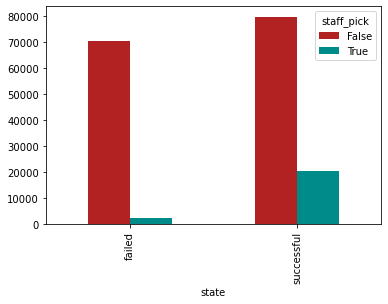

In [260]:
pd.crosstab(df['state'],df['staff_pick']).plot.bar(color = ['firebrick', 'darkcyan'])

Text(0.5, 0, 'Mean backer count')

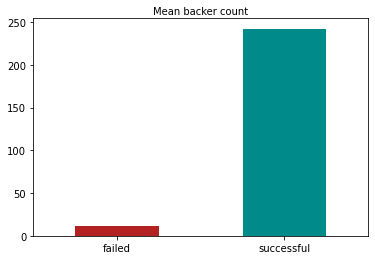

In [261]:
graph1 = df.groupby('state').backers_count.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)
graph1.set_xlabel('Mean backer count')
graph1.xaxis.set_label_position('top') 

Text(0.5, 0, 'Mean goal amount')

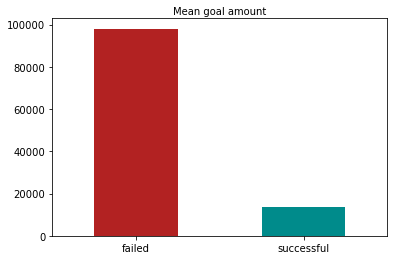

In [262]:
graph1 = df.groupby('state').goal.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)
graph1.set_xlabel('Mean goal amount')
graph1.xaxis.set_label_position('top') 

Text(0.5, 0, 'Mean amount pledged (USD)')

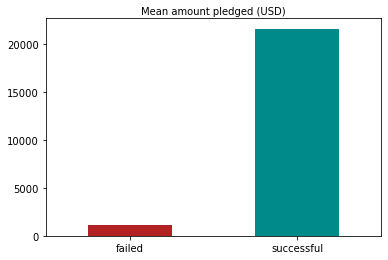

In [263]:
graph = df.groupby('state').usd_pledged.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)
graph.set_xlabel('Mean amount pledged (USD)')
graph.xaxis.set_label_position('top') 


Text(0.5, 0, 'Mean blurb length')

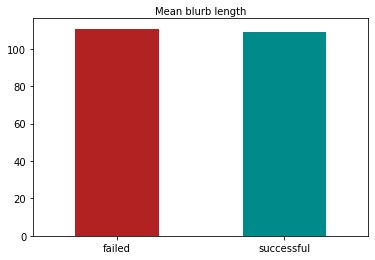

In [264]:
graph = df.groupby('state').blurb_length.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)
graph.set_xlabel('Mean blurb length')
graph.xaxis.set_label_position('top') 


Text(0.5, 0, 'Mean name length')

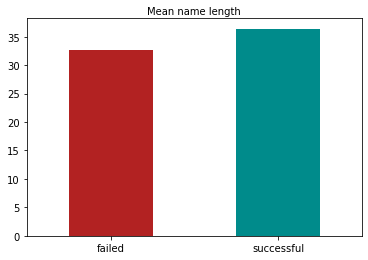

In [265]:
graph = df.groupby('state').name_length.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)
graph.set_xlabel('Mean name length')
graph.xaxis.set_label_position('top') 

Text(0.5, 0, 'Mean campaign length')

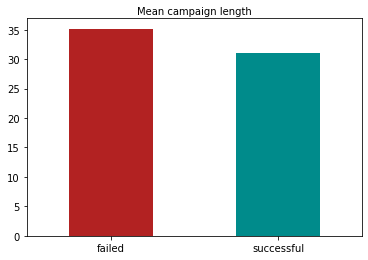

In [266]:
graph = df.groupby('state').campaign_length.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)
graph.set_xlabel('Mean campaign length')
graph.xaxis.set_label_position('top') 

The boxplots below show that the highest median amount pledged were on Tuesdays. Tuesday also has higher third quartile amounts and maximum amounts. On the other hand, lower amounts of money were pledged on the weekends. 

The best month to raise money are May and March, while December sees the least amount of money raised, in alignment with the analysis above. The times associated with the most amount of money raised are 2pm-4pm, followed by 4pm-6pm. Amount of money raised steadily decreases from 6pm onwards as people start to switch off for the day.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

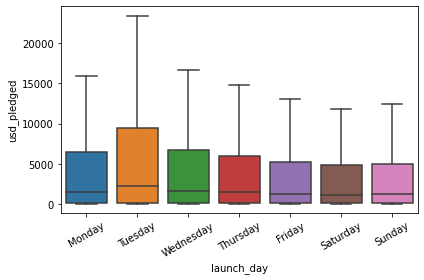

In [267]:
chart = sns.boxplot(x="launch_day", y="usd_pledged", data=df ,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],showfliers=False );
plt.xticks(rotation=30)
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

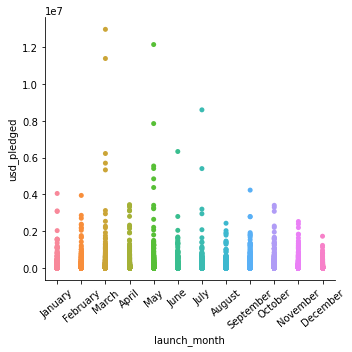

In [268]:
chart = sns.catplot(x="launch_month", y="usd_pledged", data=df, jitter=False,order=['January','February','March','April','May','June','July','August','September','October','November','December']);
plt.xticks(rotation=40)
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

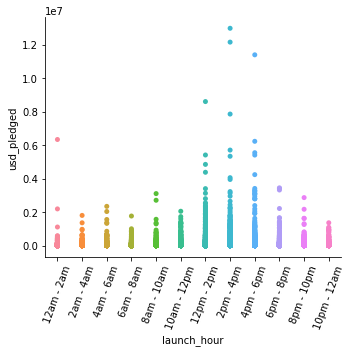

In [269]:
chart = sns.catplot(x="launch_hour", y="usd_pledged", data=df, jitter=False, order=['12am - 2am','2am - 4am', '4am - 6am', '6am - 8am', '8am - 10am', '10am - 12pm', '12pm - 2pm', '2pm - 4pm', '4pm - 6pm','6pm - 8pm','8pm - 10pm', '10pm - 12am']) 
plt.xticks(rotation=70)
plt.tight_layout()

# Predictive Analysis

Before model training, the dataset is split into training and testing sets. 80% of the dataset is used for training and 20% of the dataset is used for testing. The target variable is the column 'state', which tells us whether or not a project met its funding goal (successful/ failed). One hot encoding is performed on both the train and test sets to transform categorical variables into numerical variables. StandardScaler is then applied to ensure that the features are normally distributed.

In [270]:
#concat_df = pd.concat([x_train , x_test])

#features_df = pd.get_dummies(concat_df)
y = df['state'] 
df = df.drop(['state'], axis=1)
#X = features_df
#x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=4)

#df = df[~df.index.duplicated()]

x = df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 4)


#one hot encoding 

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

x_train.shape
x_test.shape

(138252, 61)

(34564, 61)

In [271]:
#data normalisation - standard scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
normalized_x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

# Model 1: Logistic Regression

Logistic regression has an accuracy rate of 78.15%. According to the confusion matrix, the model classified 27013 instances correctly and 7551 instances incorrectly. One interesting thing to note is that "failed" class had low precision but high recall, and "successful" class had high precision but low recall. Both classes have relatively high f1-scores. 

In [272]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='sag')
model.fit(normalized_x_train, y_train)
y_pred_lr = model.predict(normalized_x_test)
print(y_pred_lr[:10])


/Users/elleentiong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

['failed' 'failed' 'failed' 'successful' 'failed' 'failed' 'successful'
 'successful' 'successful' 'failed']


In [273]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.15%


In [274]:
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix)

[[13883   826]
 [ 6726 13129]]


In [275]:

#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Recall is the ability of a classifier to find all positive instances.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

      failed       0.67      0.94      0.79     14709
  successful       0.94      0.66      0.78     19855

    accuracy                           0.78     34564
   macro avg       0.81      0.80      0.78     34564
weighted avg       0.83      0.78      0.78     34564



# Model 2: Random Forest Classifier

The random forest classifier outperformed the logistic regression model with an accuracy of 89.19%. The model also produced higher f1-scores, performing strongly both in precision and recall. There were 30849 correct classifications and 3715 incorrect classifications. 

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

['failed' 'failed' 'successful' ... 'failed' 'failed' 'successful']


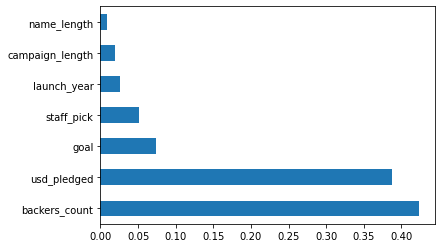

In [276]:
#https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rf.fit(x_train, y_train) #training with train set


y_pred = rf.predict(x_test)
print(y_pred)
(pd.Series(rf.feature_importances_, index=x_train.columns)
   .nlargest(7)
   .plot(kind='barh')) 


In [277]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.49%


In [278]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11881  2828]
 [  806 19049]]


In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      failed       0.94      0.81      0.87     14709
  successful       0.87      0.96      0.91     19855

    accuracy                           0.89     34564
   macro avg       0.90      0.88      0.89     34564
weighted avg       0.90      0.89      0.89     34564



# Model 3: XGBoost


XGBoosting performed slightly better than Random Forest, and has a similar f1 score for 'successful' class and a slightly higher f1 score for 'failed' class. 

In [280]:
#xgboost = overfitting?
#normalized_x_test = normalized_x_test[normalized_x_train.columns]
import xgboost as xgb
from xgboost import XGBClassifier


normalized_x_test = normalized_x_test.to_numpy()
normalized_x_train = normalized_x_train.to_numpy()


xgbmodel = XGBClassifier(learning_rate=0.01, max_depth = 10)
#xgbmodel = XGBClassifier()
xgbmodel.fit(normalized_x_train, y_train)
# make predictions for test data
y_pred_xgb = xgbmodel.predict(normalized_x_test)
print(y_pred_xgb)
# evaluate predictions


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

['failed' 'failed' 'successful' ... 'failed' 'failed' 'successful']


In [281]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.19%


In [282]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

# Conclusion and Recommendations

To increase the chances of campaign success, project creators are recommended to: 
- launch projects in music, specifically Rock and Country music and in Books 
- launch projects in the month of March
- launch projects on Tuesdays
- increase marketing activity between 2pm to 6pm as there is higher donation activity during these times 
- set a lower goal amount (around 3500 USD)
- set a campaign length of around 30 days 
- aim to have the project picked by staff 


Things to avoid include:
- launching projects in Web, Mobile Games, Software and Restaurants 
- launching projects at the end of the year (October, November, December)
- lauching projects on the weekends 
- launching projects between 8pm to 12pm 
- setting a high goal amount 
- having a campaign length longer than a month

The machine learning model used to predict whether or not a project would be successful was trained using Logistic Regression, Random Forest and XGBoosting. All three models performed well, however the XGBoosting model had the best performance with an accuracy of 90.19%. All three models also had high f1 scores, which indicates a good balance between precision and recall. 

# References

https://webrobots.io/kickstarter-datasets/

https://stackoverflow.com/questions/52289386/loading-multiple-csv-files-of-a-folder-into-one-dataframe

https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names

https://stackoverflow.com/questions/45603232/python-difference-between-two-unix-timestamps

https://stackoverflow.com/questions/63278204/python-pandas-regex-outputting-nan

https://towardsdatascience.com/using-machine-learning-to-predict-kickstarter-success-e371ab56a743